# Data Preprocessing

In [368]:
# %%

%matplotlib inline

In [369]:
# %%

import pandas as pd
import missingno as msno
import numpy as np

In [370]:
# %%

data = pd.read_csv("../docs/dataset_KNN.csv")
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [371]:
# %%

# Generate descriptive statistics of the data
# Including quartiles at 25%, 75%, and 99% for a more detailed view
data.describe([0.25, 0.75, 0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,13.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,196.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,106.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,53.20000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,580.47000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,51.01200,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00000,1.00


Text(0, 0.5, 'Frequency')

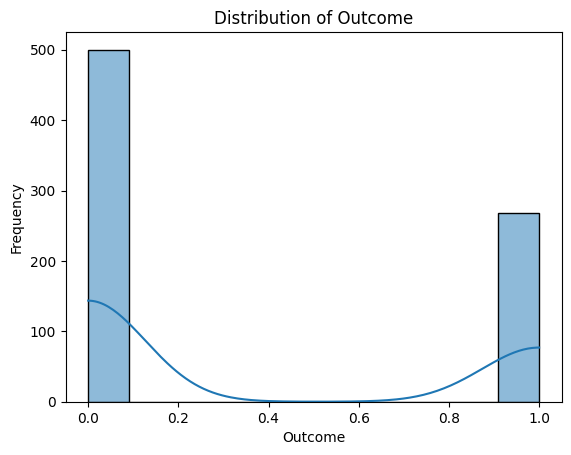

In [372]:
# %%

import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable column name
target_column = "Outcome"

# Create a histogram with a kernel density estimate for the target variable
sns.histplot(data[target_column], kde=True)
plt.title(f"Distribution of {target_column}")  # Set the title of the plot
plt.xlabel(target_column)  # Set the label for the x-axis
plt.ylabel("Frequency")  # Set the label for the y-axis

<Axes: >

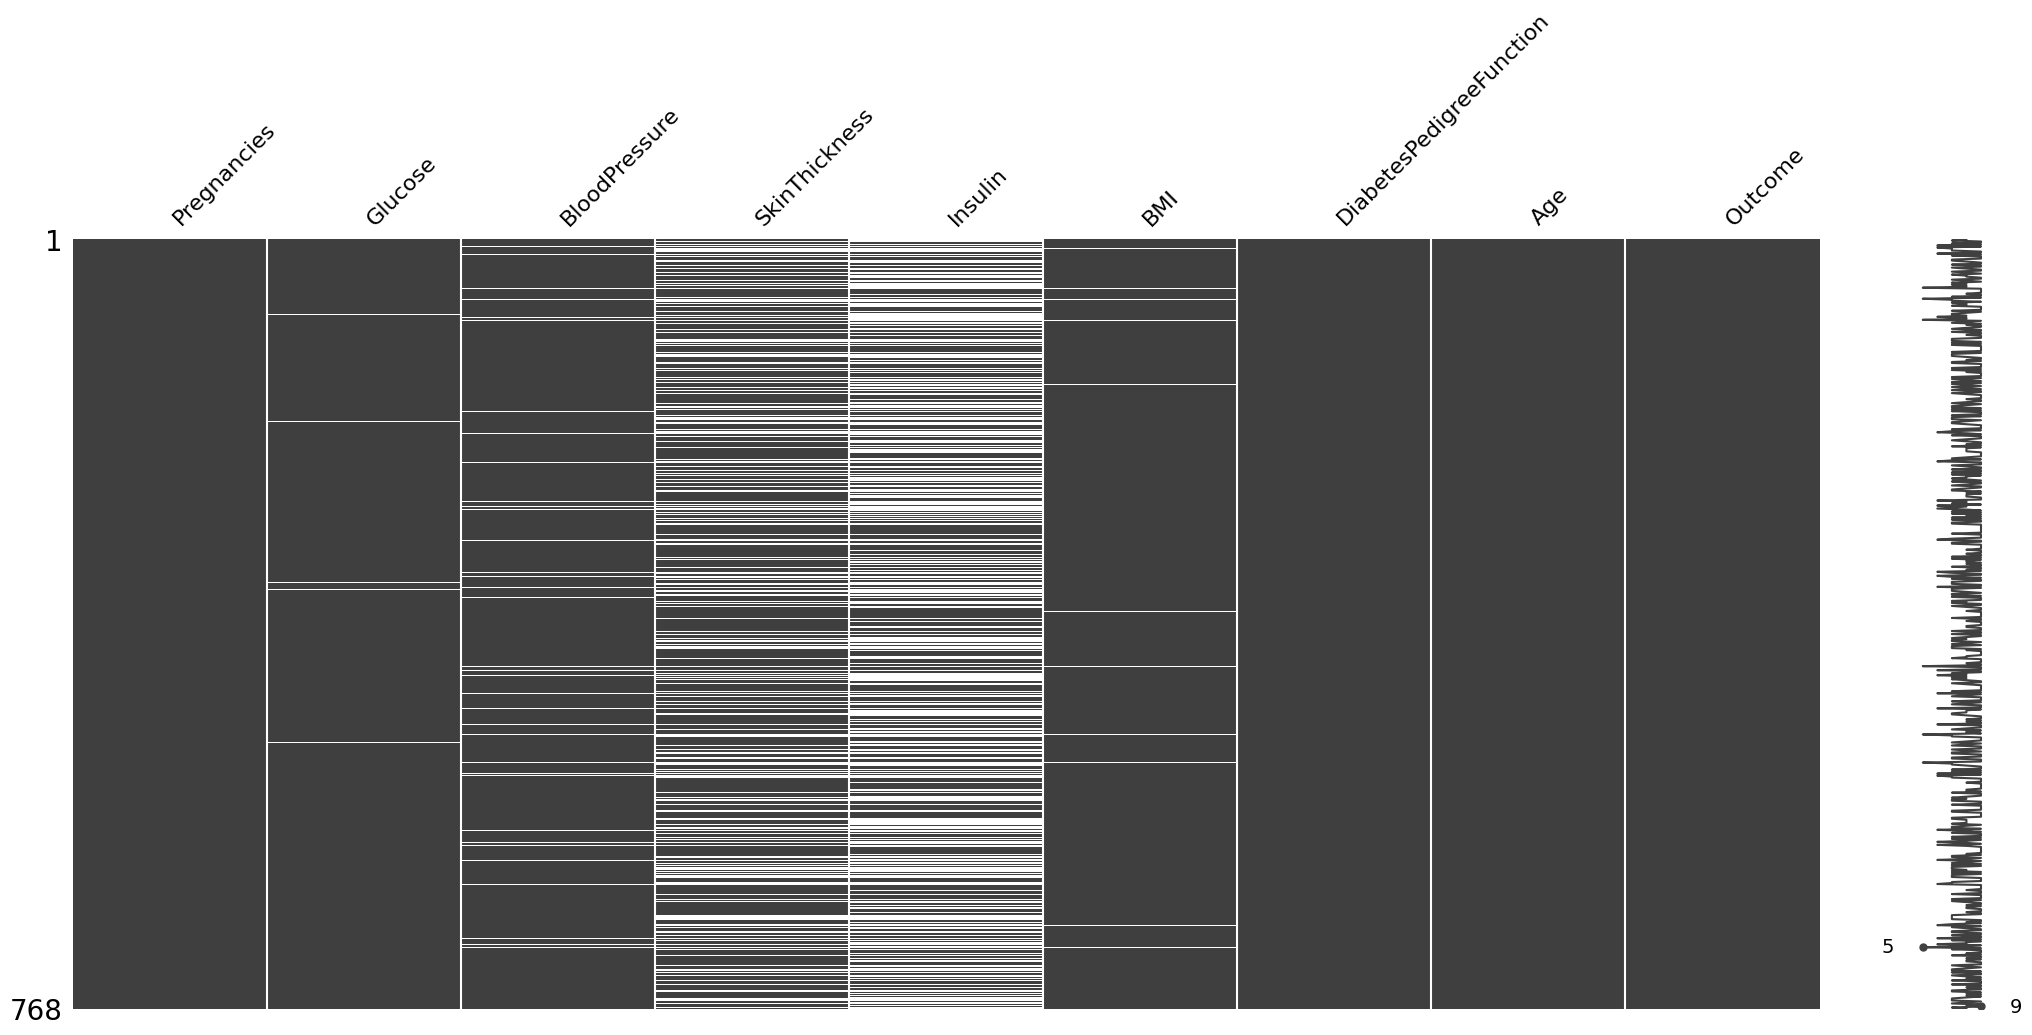

In [373]:
# %%

# Visualize missing data using a matrix plot
# Each white line represents a missing value, providing a quick overview
msno.matrix(data)

<Axes: >

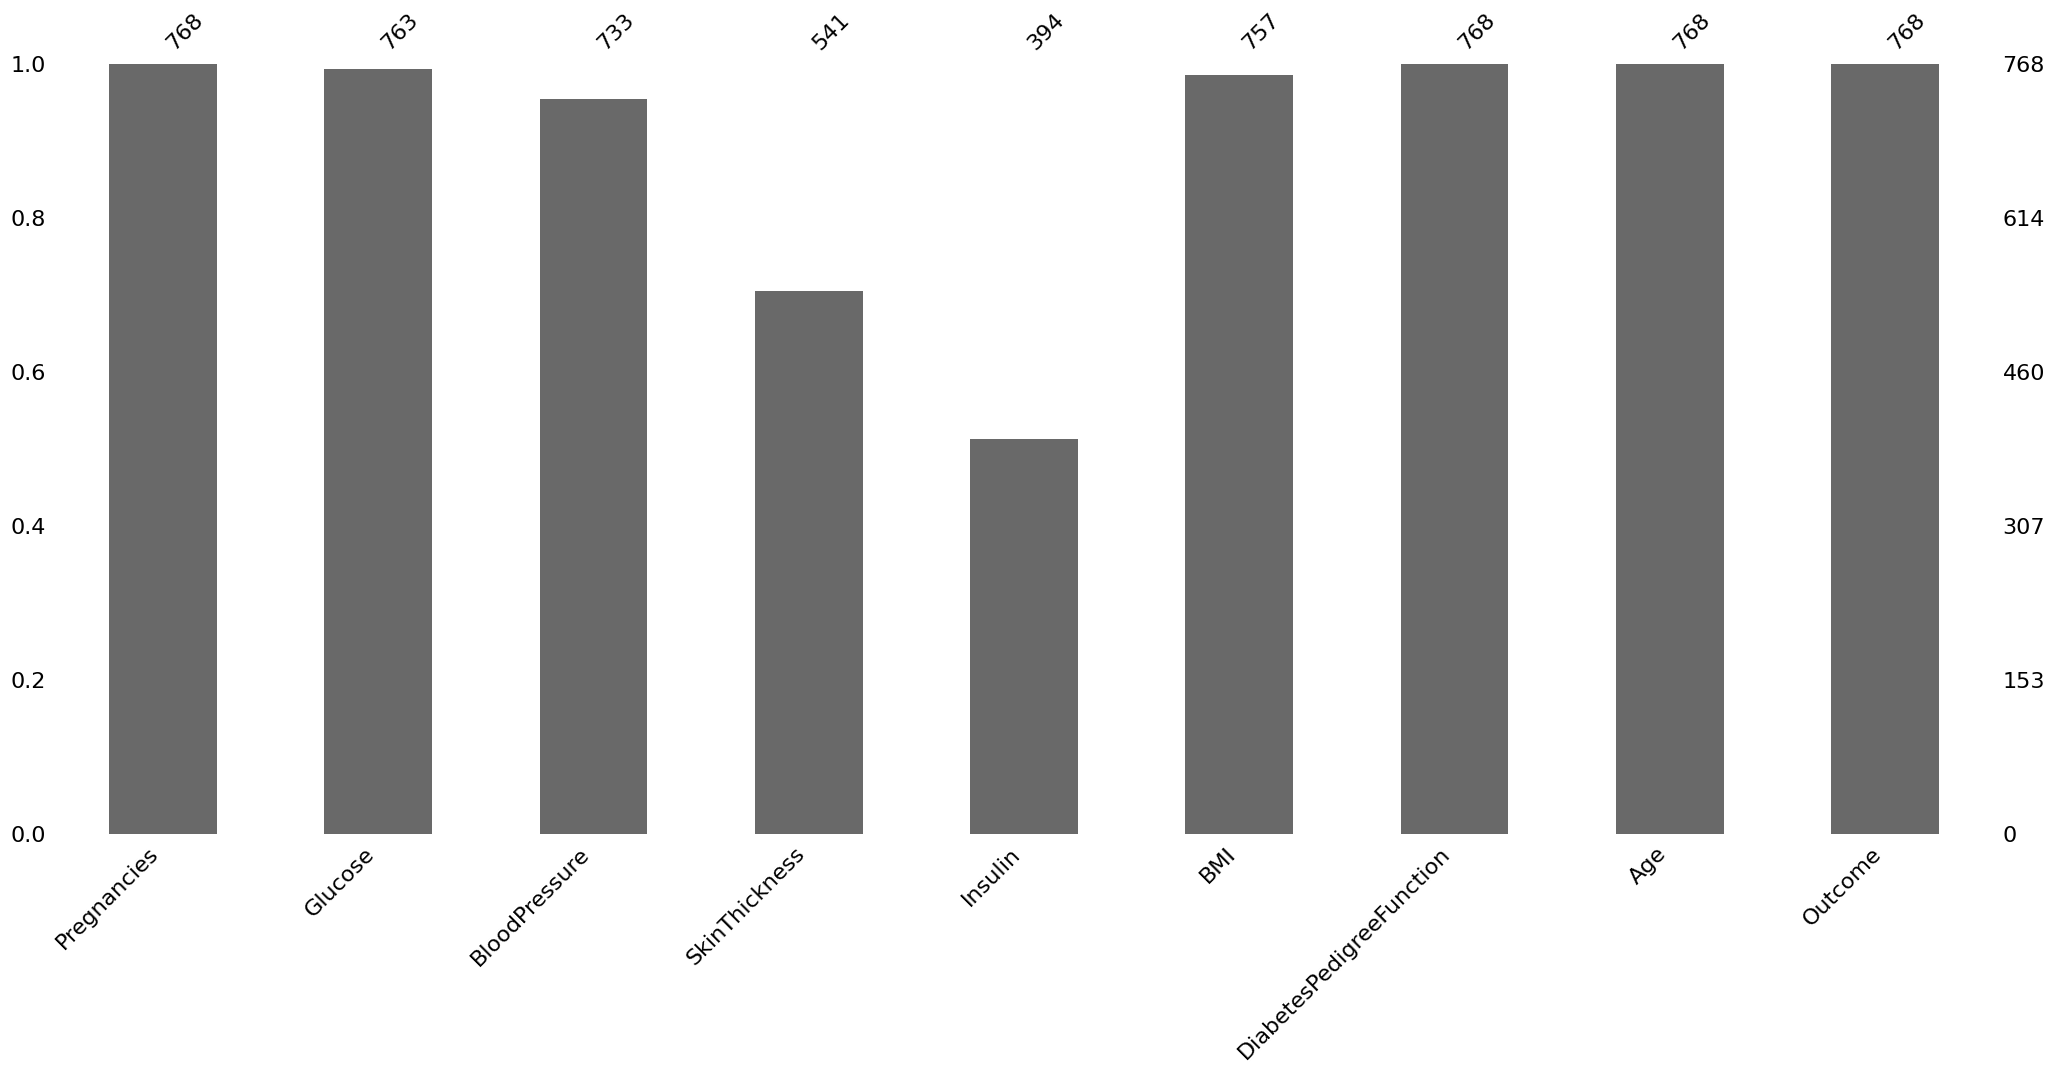

In [374]:
# %%

# Visualize missing data using a bar chart
# Shows the count of non-missing values for each variable
msno.bar(data)

<Axes: >

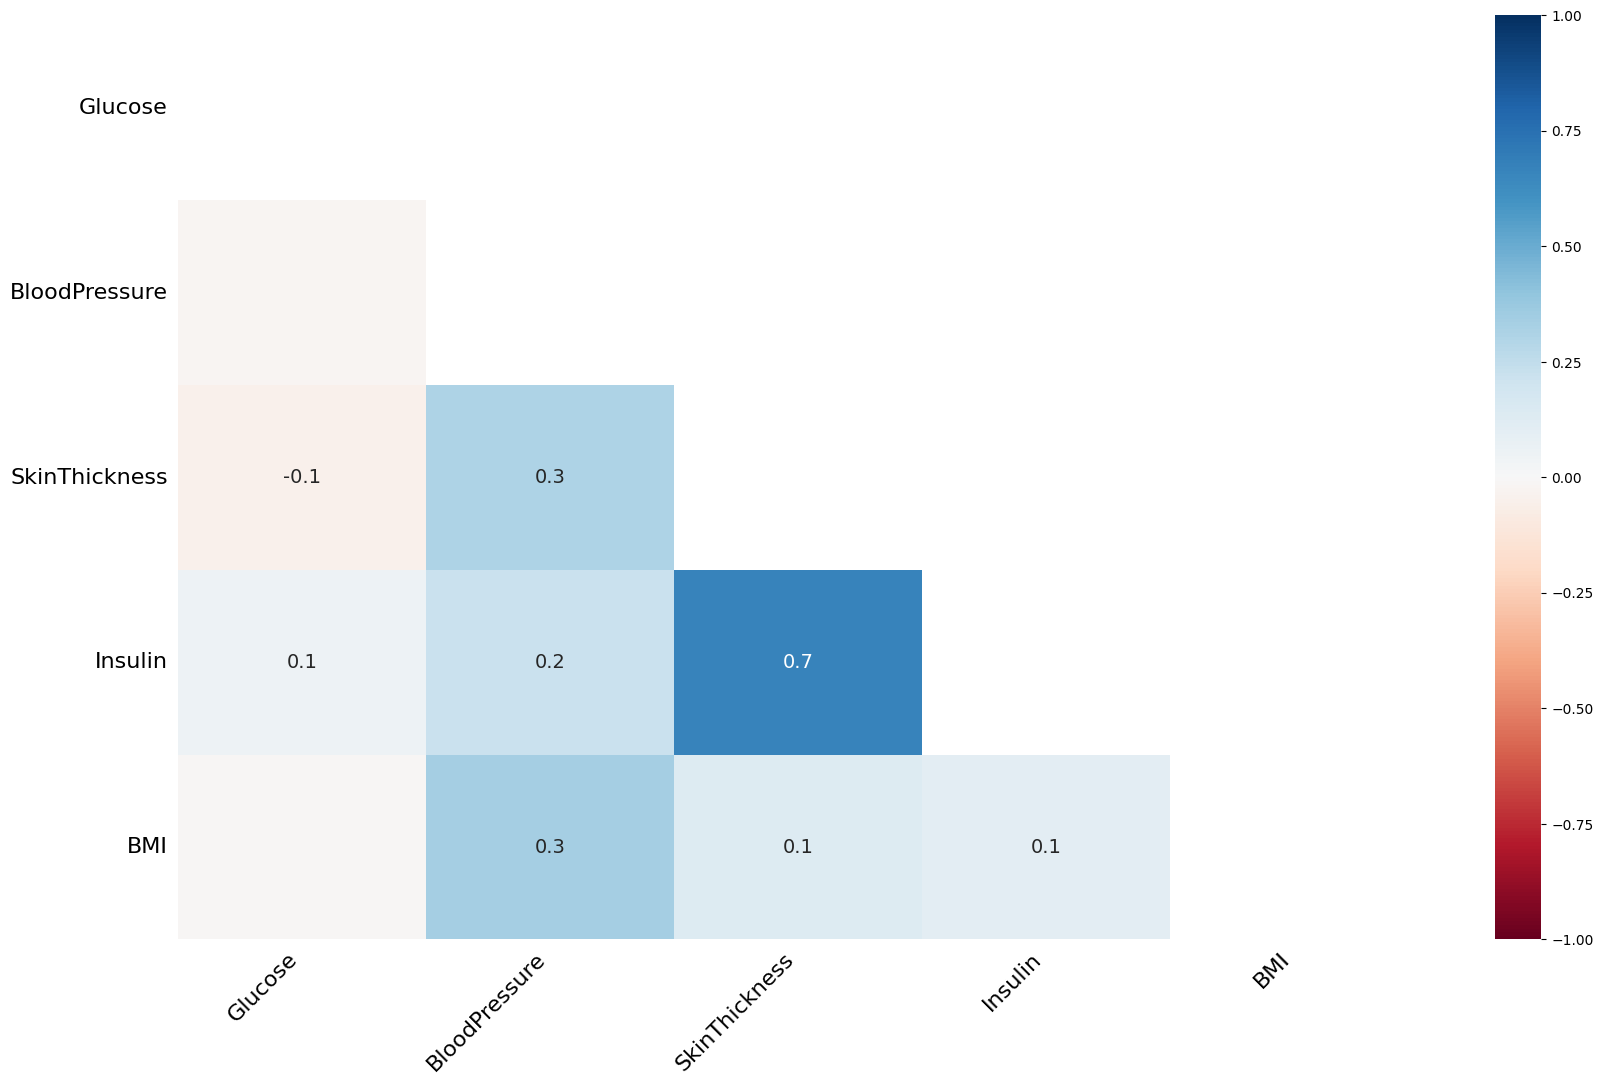

In [375]:
# %%

# Visualize missing data using a heatmap
# Shows correlations between missing values in different columns
msno.heatmap(data)

<Axes: >

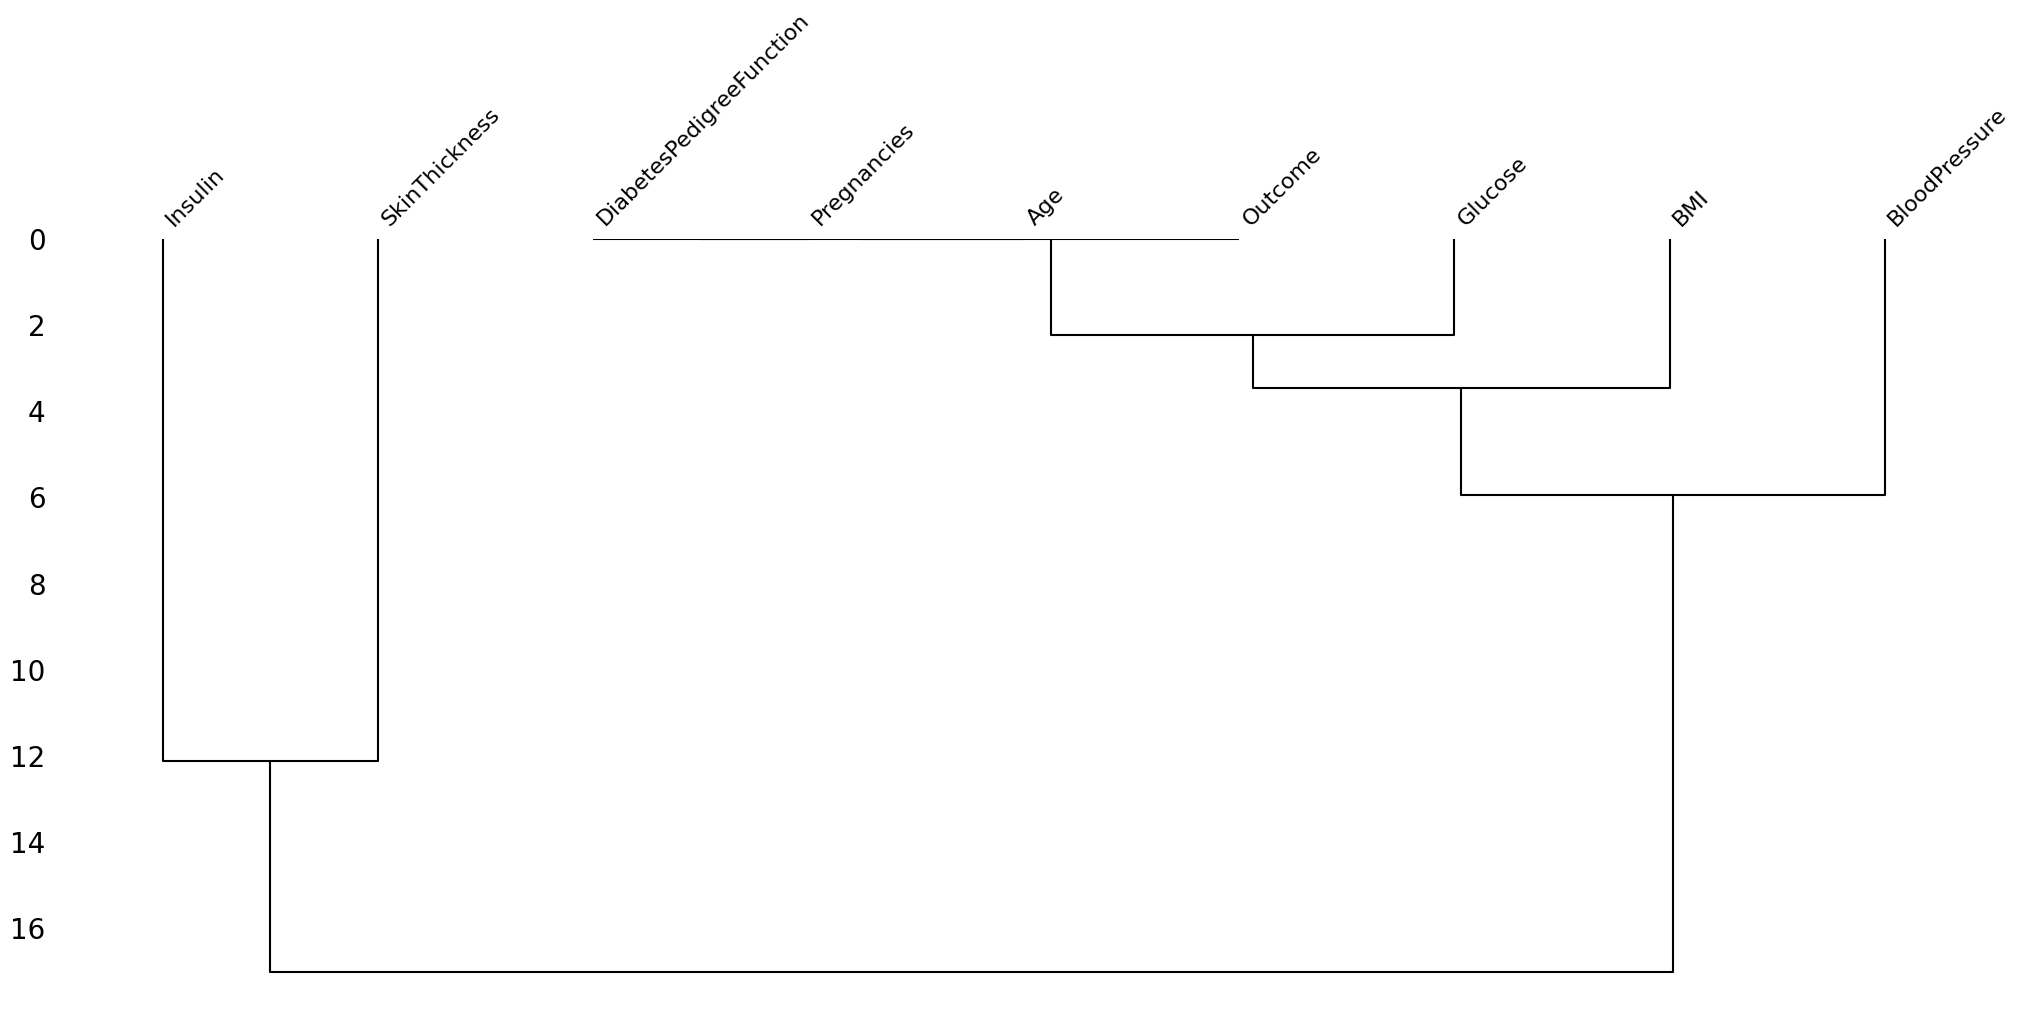

In [376]:
# %%

# Visualize missing data using a dendrogram
# Clusters variables based on their nullity correlation
msno.dendrogram(data)

In [377]:
# %%

# Calculate the percentage of missing values for each column
percent_missing = data.isnull().sum() * 100 / len(data)

# Print the percentage of missing values
print(percent_missing)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


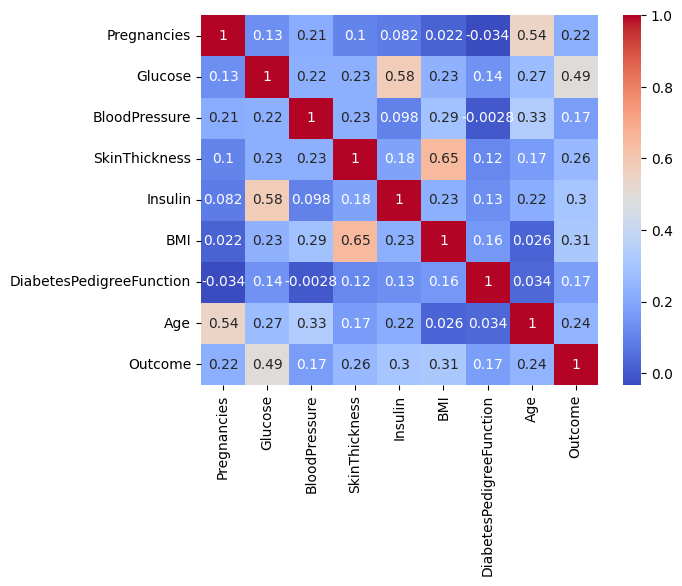

In [378]:
# %%

# Calculate the Pearson correlation matrix
correlation_matrix = data.corr(method="pearson")
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [379]:
# %%

# Remove rows with missing values in specific columns
data.dropna(subset=["Glucose", "BloodPressure", "BMI"], inplace=True)

In [380]:
# %%

# Replace zeroes with NaN in specified columns
data[["SkinThickness", "Insulin"]] = data[["SkinThickness", "Insulin"]].replace(0, np.nan)

In [381]:
# %%

# Recalculate and print the percentage of missing values after replacements
percent_missing = data.isnull().sum() * 100 / len(data)

print(percent_missing)

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness               26.519337
Insulin                     45.856354
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [382]:
# %%

# Import IterativeImputer for multivariate imputation
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer

# Create a copy of the data for imputation
data_copy = data.copy()
# Initialize IterativeImputer with specified parameters
imputer = IterativeImputer(max_iter=10, random_state=0, min_value=0)
# Fit the imputer to the data and transform it to fill missing values
imputed_values = imputer.fit_transform(data_copy)

In [383]:
# %%

# Replace the original data with the imputed values
data_copy.loc[:, :] = imputed_values
data = data_copy

## Outlier Handling

### Box Plots

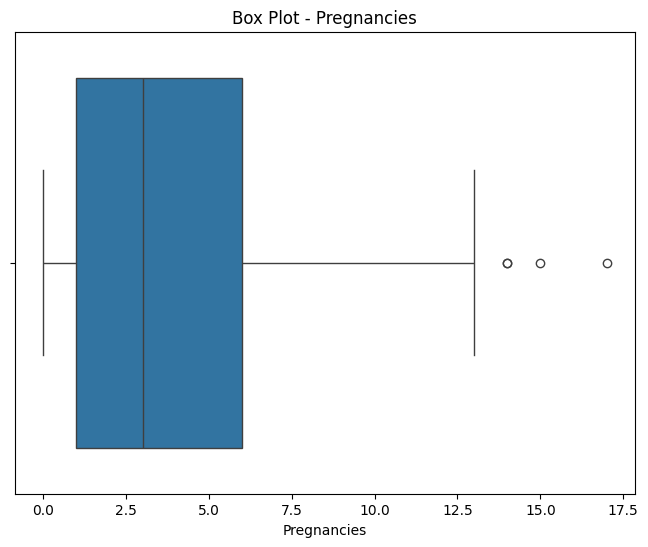

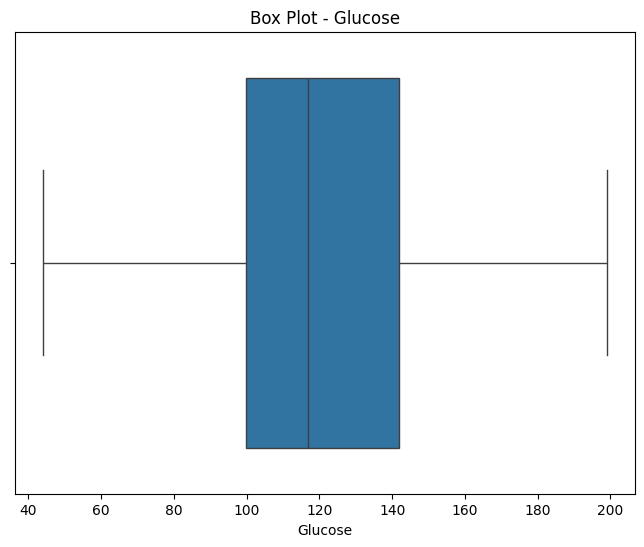

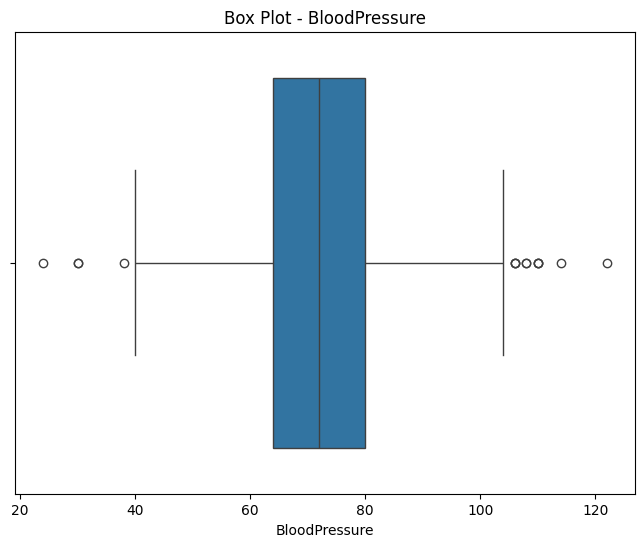

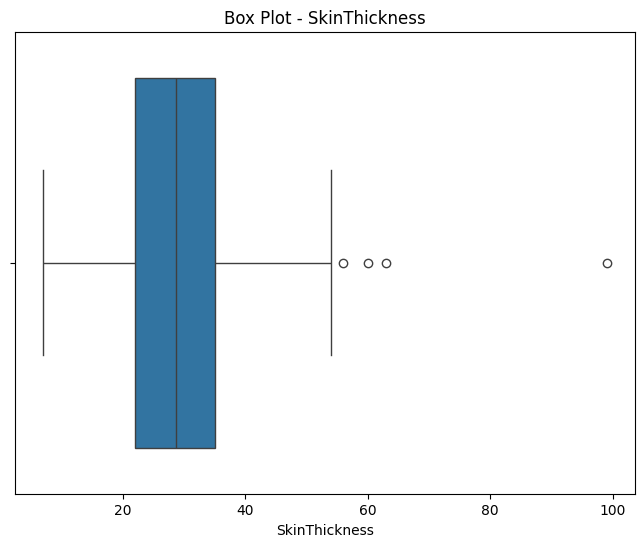

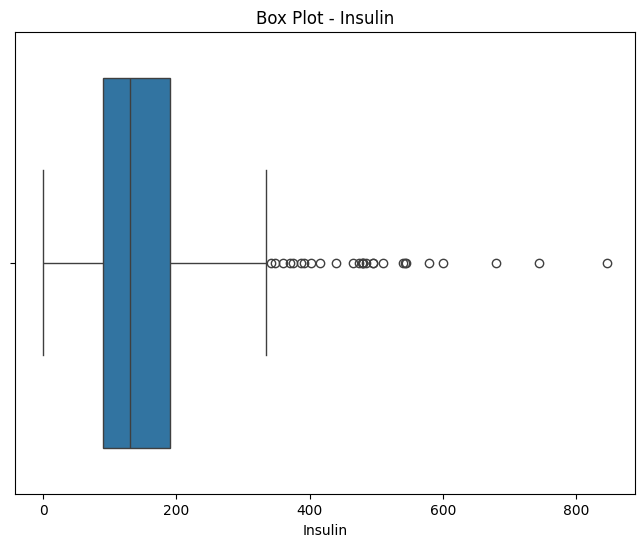

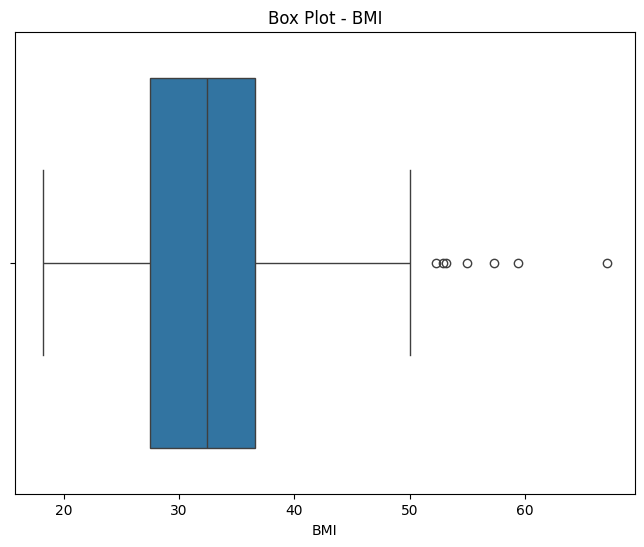

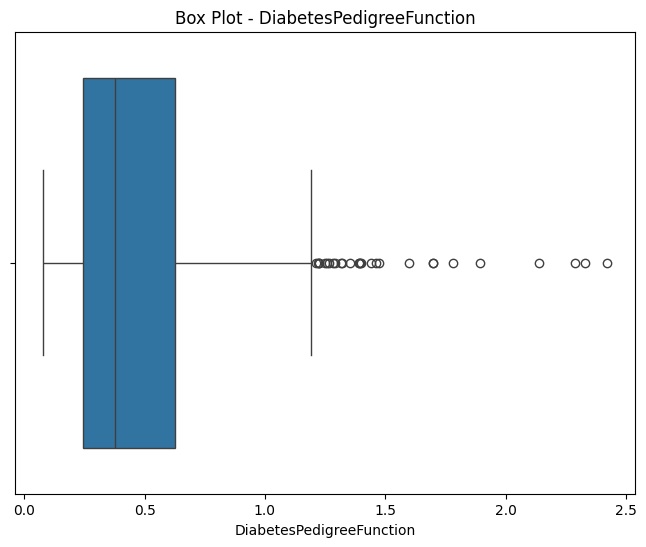

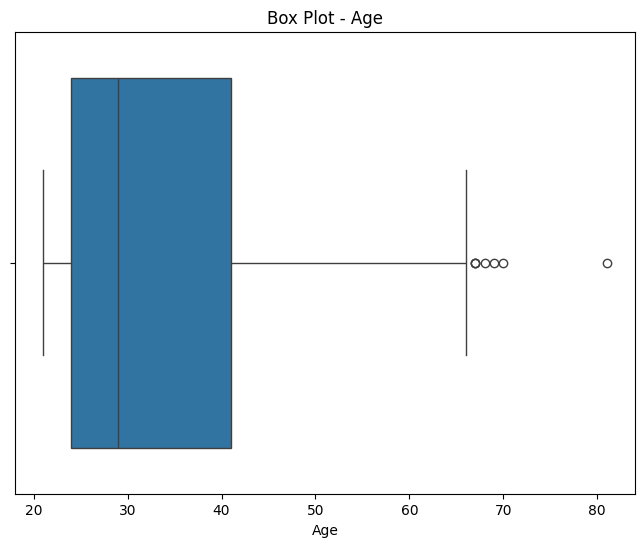

In [384]:
# %%

# Create box plots for each feature (excluding the target variable)
for feature in data.drop("Outcome", axis=1):
    column_data = data[feature]
    # Set up the plot figure
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x=column_data)

    # Set the title and labels
    plt.title(f"Box Plot - {feature}")
    plt.xlabel(feature)

    # Calculate quartiles and whiskers
    quartiles = np.percentile(column_data, [25, 50, 75])
    IQR = quartiles[2] - quartiles[0]
    lower_whisker = column_data[column_data >= (quartiles[0] - 1.5 * IQR)].min()
    upper_whisker = column_data[column_data <= (quartiles[2] + 1.5 * IQR)].max()

    plt.show()

### Histograms

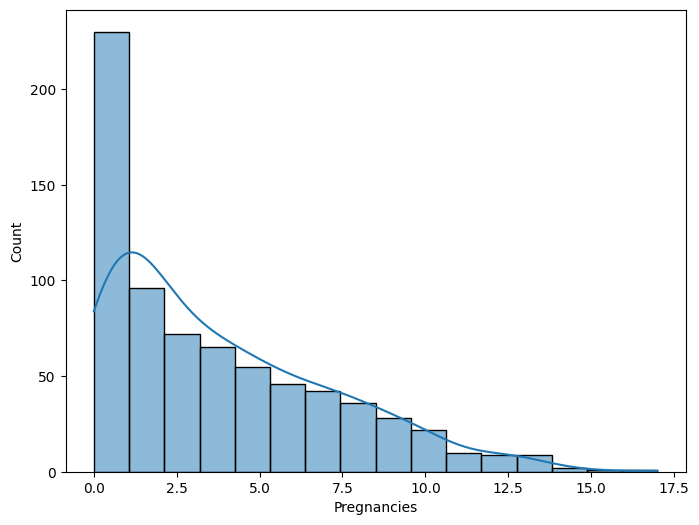

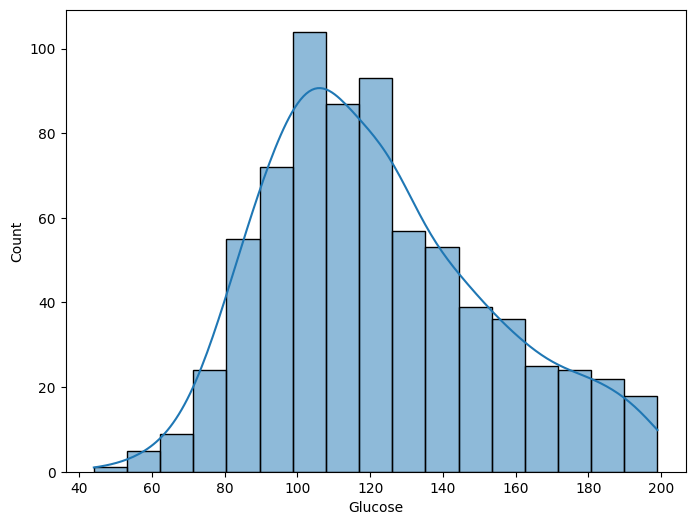

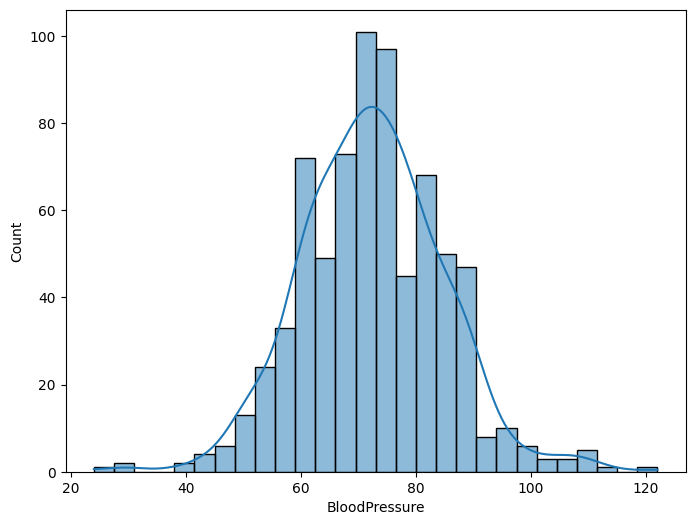

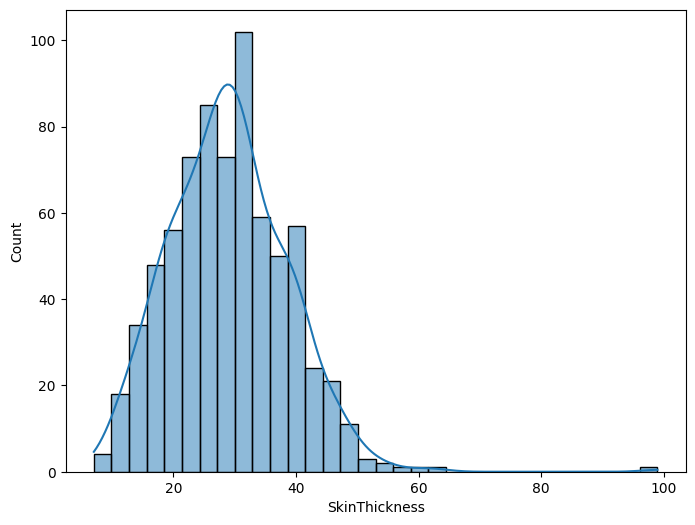

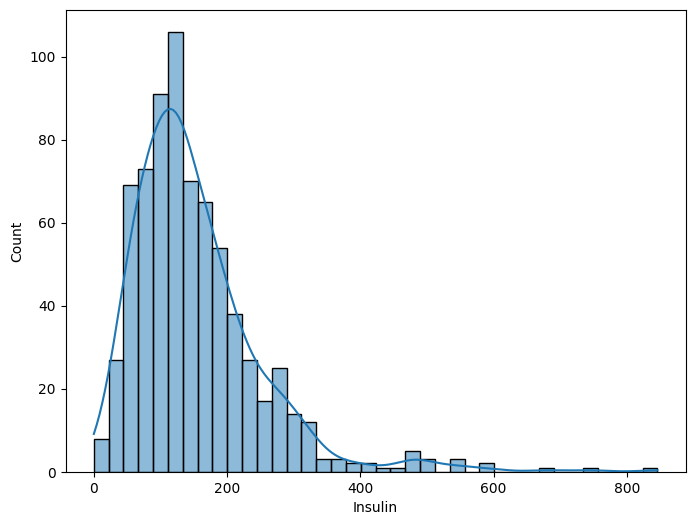

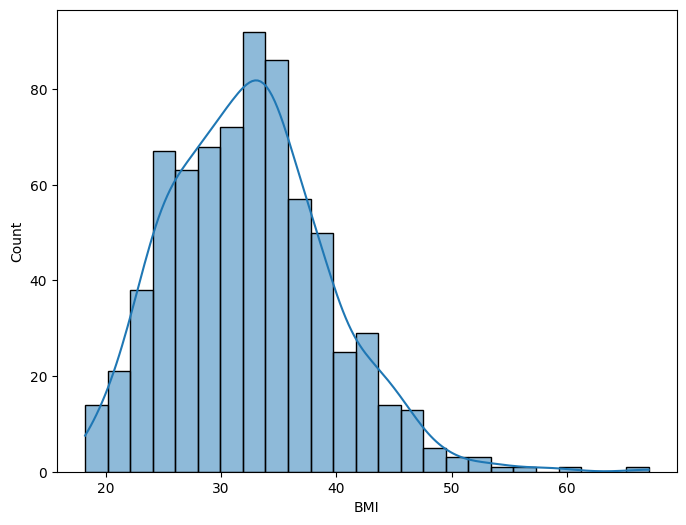

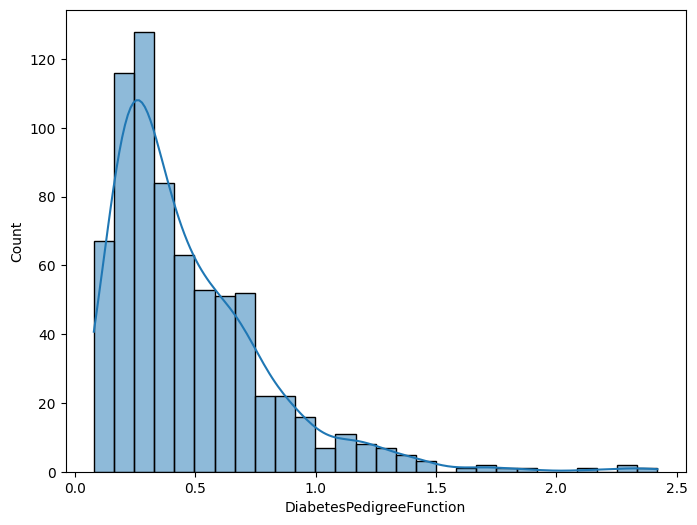

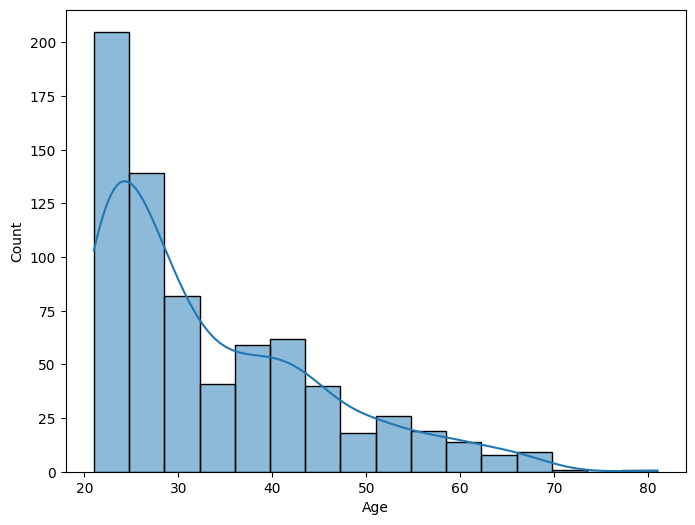

In [385]:
# %%

# Create histograms for each feature (excluding the target variable)
for feature in data.drop("Outcome", axis=1):
    column_data = data[feature]
    # Set up the plot figure
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)  # kde adds a kernel density estimate
    plt.show()

### Z-Scores

In [386]:
# %%

from scipy import stats

# Calculate and print outlier values based on z-scores for each feature
for feature in data.drop("Outcome", axis=1):
    z = np.abs(stats.zscore(data[feature]))
    threshold = 3
    outlier_indices = np.where(z > threshold)
    outlier_values = data[feature].iloc[outlier_indices]
    print(f"{feature} - Outlier values: {outlier_values.values}")

Pregnancies - Outlier values: [15 17 14 14]
Glucose - Outlier values: []
BloodPressure - Outlier values: [ 30. 110. 122.  30. 110. 110.  24. 114.]
SkinThickness - Outlier values: [60. 63. 99.]
Insulin - Outlier values: [543. 846. 495. 485. 495. 478. 744. 680. 545. 465. 579. 474. 480. 600.
 540. 480. 510.]
BMI - Outlier values: [53.2 55.  67.1 59.4 57.3]
DiabetesPedigreeFunction - Outlier values: [2.288 1.893 1.781 2.329 1.476 2.137 1.6   2.42  1.699 1.698]
Age - Outlier values: [69 81 70]


In [387]:
# %%

import pandas as pd
import numpy as np

# Calculate and print outliers based on IQR for each feature
for feature in data.drop("Outcome", axis=1):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(outliers)

88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Series([], Name: Glucose, dtype: float64)
18      30.0
43     110.0
84     108.0
106    122.0
125     30.0
177    110.0
362    108.0
549    110.0
597     24.0
599     38.0
658    106.0
662    106.0
672    106.0
691    114.0
Name: BloodPressure, dtype: float64
57     60.0
120    56.0
445    63.0
579    99.0
Name: SkinThickness, dtype: float64
8      543.000000
13     846.000000
54     342.000000
111    495.000000
153    485.000000
186    495.000000
220    478.000000
228    744.000000
231    370.000000
247    680.000000
248    402.000000
258    375.000000
286    545.000000
296    360.000000
370    465.000000
392    415.000000
409    579.000000
415    474.000000
486    480.000000
579    348.581616
584    600.000000
645    440.000000
655    540.000000
695    480.000000
710    387.000000
715    392.000000
753    510.000000
Name: Insulin, dtype: float64
120    53.2
125    55.0
177    67.1
247    52.3
303    52.9
445    5

In [388]:

# # Create a copy to avoid modifying the original
# from scipy import stats


# df_transformed = data.copy()

# for feature in df_transformed.drop("Outcome", axis = 1):

#     values = df_transformed[feature].values

#     # Apply Box-Cox transformation
#     transformed_values, lambda_ = stats.boxcox(values + 1e-6)

#     # Replace the original column with the transformed values
#     df_transformed[feature] = transformed_values

# data = df_transformed
# df_transformed

In [389]:
# %%

# Separate the target variable (y) and features (X)
y = data["Outcome"]
X = data.drop("Outcome", axis=1)
# Store column names and index for later use
cols = X.columns
index = X.index

## Data Scaling

In [390]:
# %%

# from sklearn.preprocessing import MinMaxScaler

# data_scaled = X.copy()

# for feature in data.drop("Outcome", axis=1):
#     # Create a copy of the DataFrame to avoid modifying the original

#     # Reshape the column values before scaling (required by scikit-learn)
#     values = data_scaled[feature].values.reshape(-1, 1)

#     # Create a MinMaxScaler object
#     scaler = MinMaxScaler()

#     # Fit and transform the values
#     scaled_values = scaler.fit_transform(values)

#     # Replace the original column with the scaled values
#     data_scaled[feature] = scaled_values

# X = data_scaled

In [391]:
# %%

from sklearn.preprocessing import RobustScaler

# Handels outliers.

# Initialize RobustScaler and fit to the features
transformer = RobustScaler().fit(X)
# Transform the features using the fitted scaler
X = transformer.transform(X)
# Convert the scaled features back to a DataFrame
X = pd.DataFrame(X, columns=cols, index=index)

In [392]:
# %%

data.to_csv("../docs/out.csv")

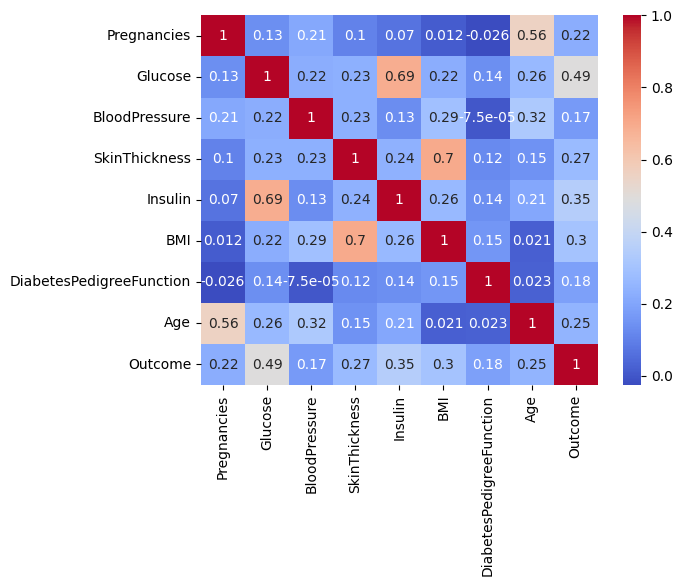

In [393]:
# %%

correlation_matrix = data.corr(method="pearson")
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Model Fittig

### K-elbow Method to find best K

In [394]:
# %%

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store distortions and inertias for different K values
distortions = []
inertias = []
# Initialize dictionaries to store mapping of K to distortion and inertia
mapping1 = {}
mapping2 = {}
# Define the range of K values to evaluate
K = range(1, 10)

# Iterate through different K values
for k in K:
    # Building and fitting the KMeans model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    # Calculate distortion and append to the list
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / X.shape[0]
    )
    # Append inertia to the list
    inertias.append(kmeanModel.inertia_)

    # Store mapping of K to distortion and inertia in dictionaries
    mapping1[k] = (
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / X.shape[0]
    )
    mapping2[k] = kmeanModel.inertia_

In [395]:
# %%

# Print the mapping of K to distortion
for key, val in mapping1.items():
    print(f"{key} : {val}")

1 : 2.057308087276859
2 : 1.8239211788189666
3 : 1.7094173856799737
4 : 1.623902625482877
5 : 1.581856503758783
6 : 1.5242375220053916
7 : 1.4853502093307598
8 : 1.4385251527503407
9 : 1.4221353174614124


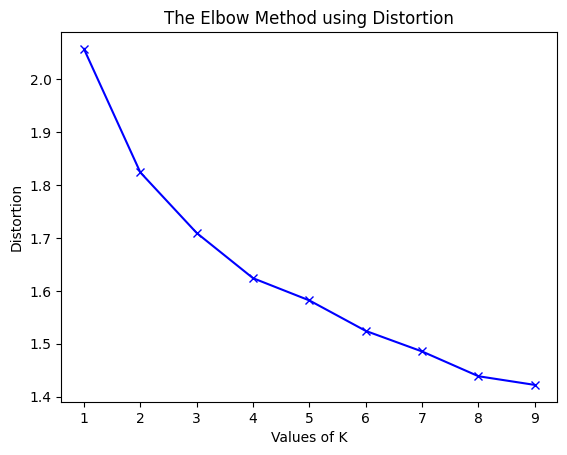

In [396]:
# %%

# Plot the elbow method using distortion
plt.plot(K, distortions, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Distortion")
plt.title("The Elbow Method using Distortion")
plt.show()

In [397]:
# %%

# Print the mapping of K to inertia
for key, val in mapping2.items():
    print(f"{key} : {val}")

1 : 3555.755716136614
2 : 2789.212914232659
3 : 2465.732166429378
4 : 2216.6902610592883
5 : 2093.5029839790886
6 : 1942.7313525158643
7 : 1866.7843437146864
8 : 1729.7148177235329
9 : 1673.6120291697782


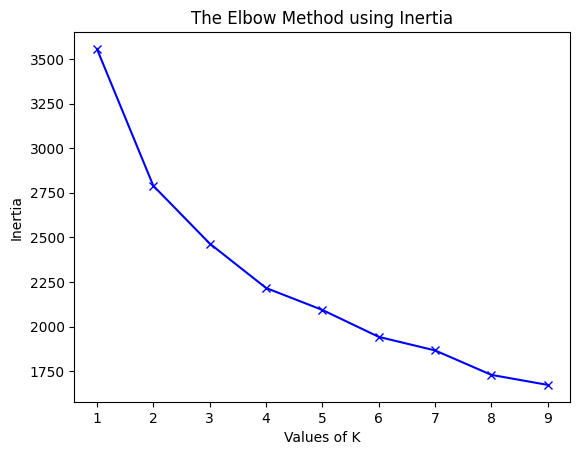

In [398]:
# %%

# Plot the elbow method using inertia
plt.plot(K, inertias, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.title("The Elbow Method using Inertia")
plt.show()

### Data Resampling

In [399]:
# %%

# Import necessary libraries for model evaluation and resampling
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets before balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train_resampled, y_train_resampled = X_train, y_train

# Apply SMOTE for oversampling to handle class imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Model Fitting k=3

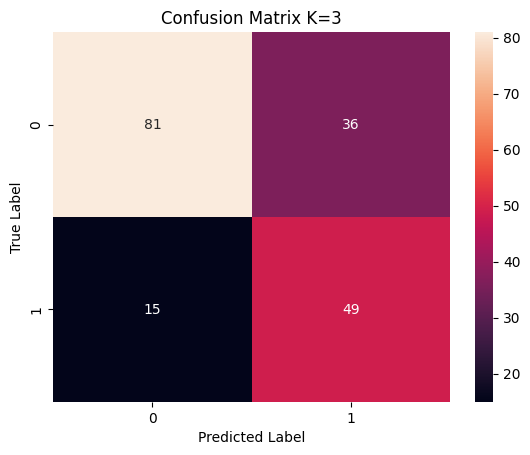

Classification Report K=3
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       117
           1       0.58      0.77      0.66        64

    accuracy                           0.72       181
   macro avg       0.71      0.73      0.71       181
weighted avg       0.75      0.72      0.72       181



In [400]:
# %%

from sklearn.metrics import classification_report

# Set K value for KNN
k = 3
# Initialize KNeighborsClassifier with specified parameters
model_3 = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
# Train the model using the resampled training data
model_3.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test data
result = model_3.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, result)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix K={k}")
plt.show()

# Print the classification report
print(f"Classification Report K={k}")
print(classification_report(y_test, result))

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model_3, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")

# Calculate error rate and append to the list
error_rates = []
error_rates.append(1 - scores.mean())

### Model Fitting k=5

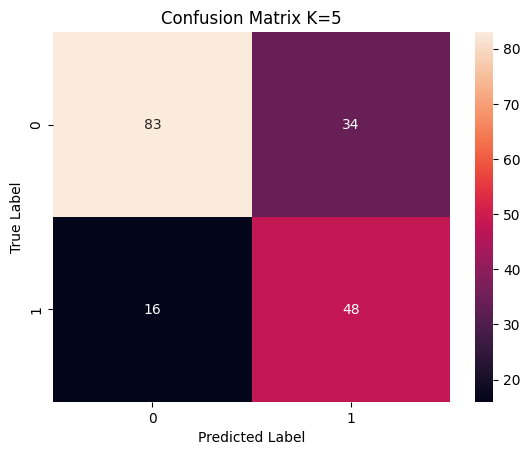

Classification Report K=5
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       117
           1       0.59      0.75      0.66        64

    accuracy                           0.72       181
   macro avg       0.71      0.73      0.71       181
weighted avg       0.75      0.72      0.73       181



In [401]:
# %%

from sklearn.metrics import classification_report

# Set K value for KNN
k = 5
# Initialize KNeighborsClassifier with specified parameters
model_5 = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
# Train the model using the resampled training data
model_5.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test data
result = model_5.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, result)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix K={k}")
plt.show()

# Print the classification report
print(f"Classification Report K={k}")
print(classification_report(y_test, result))

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model_5, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
# Calculate error rate and append to the list
error_rates.append(1 - scores.mean())

### Model Fitting k=7

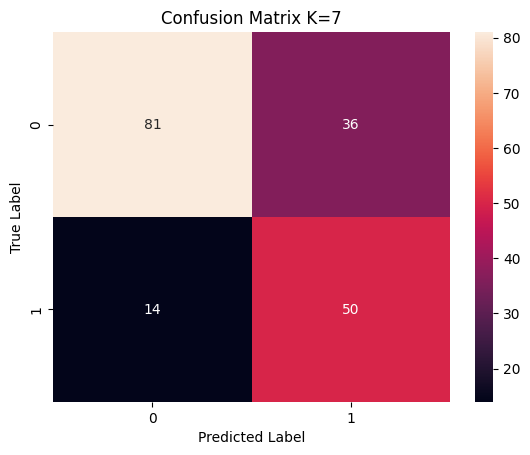

Classification Report K=7
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       117
           1       0.58      0.78      0.67        64

    accuracy                           0.72       181
   macro avg       0.72      0.74      0.72       181
weighted avg       0.76      0.72      0.73       181



In [402]:
# %%

# Import classification_report for model evaluation metrics
from sklearn.metrics import classification_report

# Set K value for KNN
k = 7
# Initialize KNeighborsClassifier with specified parameters
model_7 = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
# Train the model using the resampled training data
model_7.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test data
result = model_7.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, result)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix K={k}")
plt.show()

# Print the classification report
print(f"Classification Report K={k}")
print(classification_report(y_test, result))

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model_7, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")

# Calculate error rate and append to the list
error_rates.append(1 - scores.mean())

## ROC Curve

In [403]:
# %%

# Get probability estimates for the positive class
y_scores = model_3.predict_proba(X_test)[:, 1]

In [404]:
# %%

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

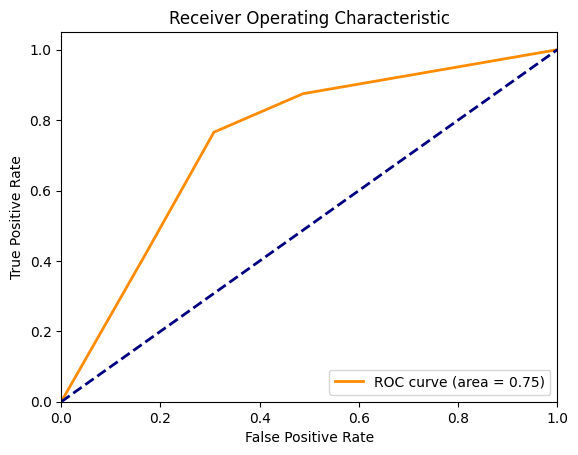

In [405]:
# %%

import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## Error Rate vs K value

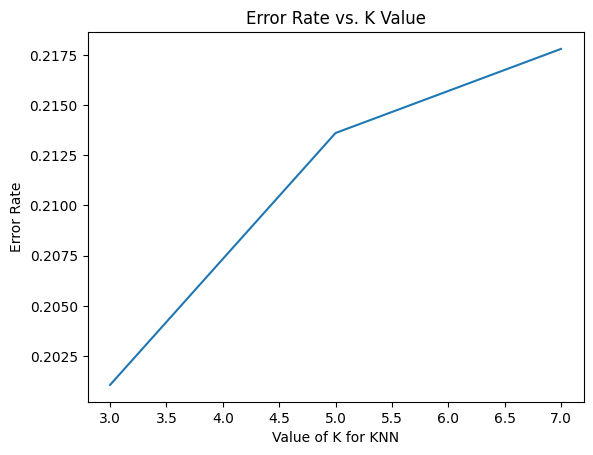

In [406]:
# %%

# Plot Error rate vs. K-value
plt.plot([3, 5, 7], error_rates)
plt.xlabel("Value of K for KNN")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K Value")
plt.show()

Top 3 Features (Permutation Importance): Index(['Glucose', 'DiabetesPedigreeFunction', 'BMI'], dtype='object')


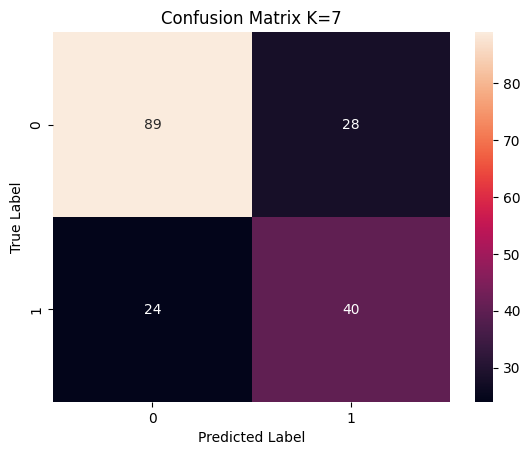

Classification Report K=7
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       117
           1       0.59      0.62      0.61        64

    accuracy                           0.71       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.72      0.71      0.71       181



In [407]:
from sklearn.inspection import permutation_importance

results = permutation_importance(
    model_3, X_train_resampled, y_train_resampled, scoring="accuracy"
)  # Use appropriate scoring metric
importance = results.importances_mean

# Sort feature importances and select the top 3
sorted_idx = importance.argsort()[::-1]  # Indices of features sorted by importance
top_3_features = X_train_resampled.columns[sorted_idx[:3]]

print("Top 3 Features (Permutation Importance):", top_3_features)


X_new = X_train_resampled[top_3_features]  # Select those features

k = 7

# Train the final KNN model on the selected subset of data:
knn_final = KNeighborsClassifier(n_neighbors=k, p=2, metric="minkowski")
knn_final.fit(X_new, y_train_resampled)

# Make predictions on the test data
result = knn_final.predict(X_test[top_3_features])

# Calculate the confusion matrix
cm = confusion_matrix(y_test, result)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix K={k}")
plt.show()

# Print the classification report
print(f"Classification Report K={k}")
print(classification_report(y_test, result))

In [408]:
X_new

,Glucose,DiabetesPedigreeFunction,BMI
0,-0.355030,-0.658824,1.439560
1,0.899408,2.546405,0.098901
2,-1.041420,-0.342484,-1.032967
3,0.307692,0.243137,-0.714286
4,0.875740,-0.371242,0.043956
...,...,...,...
711,0.527815,1.950711,-0.103845
712,1.135823,-0.117640,1.379611
713,0.175992,0.799938,-0.398408
714,0.469501,0.040556,1.496411


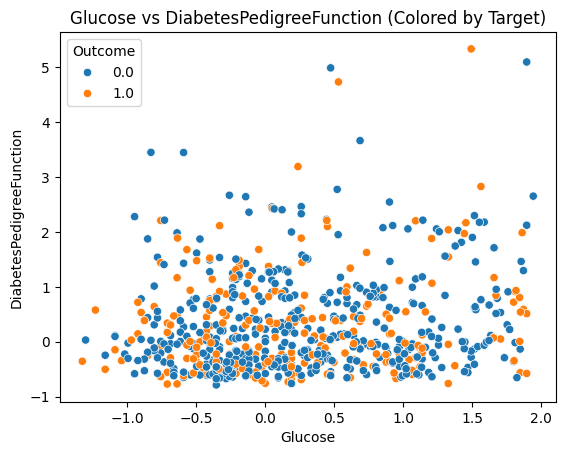

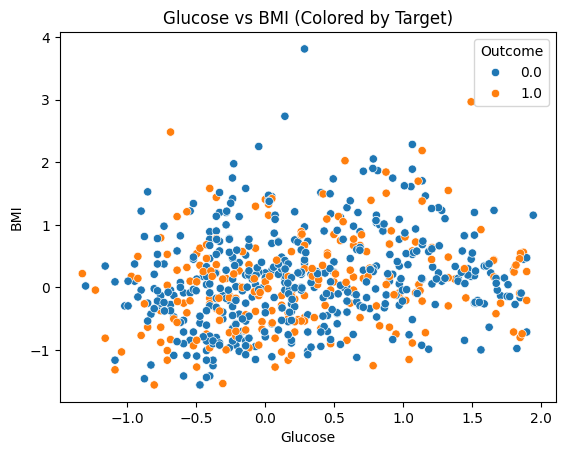

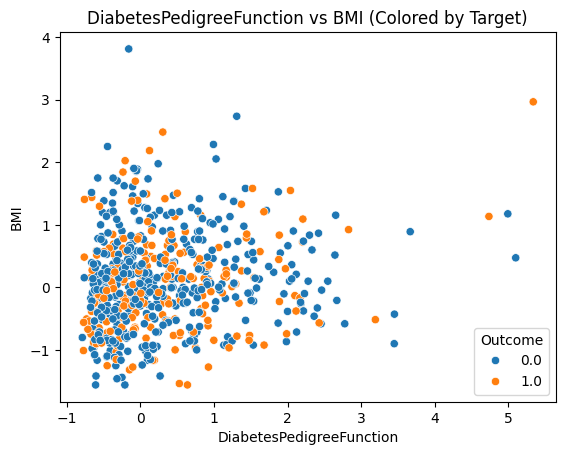

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(len(top_3_features)):
    for j in range(i + 1, len(top_3_features)):
        feature1 = top_3_features[i]
        feature2 = top_3_features[j]
        sns.scatterplot(x=X_new[feature1], y=X_new[feature2], hue=y)  # Color points by target variable
        plt.title(f"{feature1} vs {feature2} (Colored by Target)")
        plt.show()

#### Describe the Nearest Neighbors method and why scaling is important in KNN?

The k-Nearest Neighbors (KNN) algorithm classifies a data point by looking at the 'k' closest data points to it and assigning the majority class among those neighbors.

Scaling is crucial in KNN because it uses distance calculations to find those nearest neighbors. Without scaling, features with larger ranges dominate the distance metric, making the algorithm biased towards those features. Scaling ensures all features contribute equally to the distance calculation, leading to more accurate and fair predictions.


#### Explain what  your  criteria  was  for  selecting  the  three attributes.  What  other  3attribute  can  you  choose?  Visualizations  of  the  target  variable with  three  mostsignificant attributes in a 2D projection, and write your observations in 4 - 5 lines in the same collab file

Permutation importance for KNN measures feature importance by shuffling each feature individually and observing how much the model's performance (e.g., accuracy) decreases. A larger drop indicates a more important feature, as it means the model relies more on that feature for accurate predictions.

The scatter plots generated visualize the relationship between the target variable and the top 3 features selected using permutation importance. The plots show no clear separation between outcome groups, even for the "most important" features according to this method, it suggests the following possibilities:

    - Complex Interactions: The relationship between the features and the target might involve complex interactions that are not apparent in pairwise scatter plots.

    - Additional Features Needed: The selected features might provide some information, but other features not included in the top 3 are also important for accurate prediction.

    - Limitations of KNN: KNN might not be the best model for this specific dataset, even with feature selection.


#### Explain Pearson's  Correlation  Coefficient,  write the  observations  from  heatmapsdrawn.

Pearson's correlation coefficient (often denoted as r) measures the linear association between two continuous variables. It ranges from -1 to +1:

- +1: Perfect positive correlation (as one variable increases, the other increases proportionally).

- 0: No linear correlation (changes in one variable are not associated with changes in the other).

- -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).

Values closer to +1 or -1 indicate stronger linear relationships, while values closer to 0 indicate weaker or no linear relationships. It's important to remember that Pearson's correlation only measures linear relationships. Non-linear relationships might exist even if the correlation is close to 0.

**Before Preprocessing**:

- Weak to Moderate Correlations: Most of the correlations between features are relatively weak (close to 0), with some moderate correlations. For example, "Glucose" and "Insulin" show a moderate positive correlation (0.58), which is expected.

- Outcome Correlations: The "Outcome" variable has weak to moderate correlations with most features. "Glucose" (0.49) and "Age" (0.24) show relatively stronger positive correlations with the outcome compared to other features, suggesting they might be more important predictors.

**After Preprocessing:**

- Some Changes in Correlations: The correlations between some features have changed slightly after preprocessing. This is expected, as preprocessing steps like imputation and scaling can affect the relationships between variables. For example, "Glucose" and "Insulin" now have a stronger correlation of 0.69. "SkinThickness" and "BMI" also have a stronger correlation after preprocessing (0.7). This increase suggests the imputation may have addressed missingness that was obscuring the relationship between those features.

- Outcome Correlations: The correlations between the "Outcome" and some features have changed slightly as well, but the overall patterns remain relatively similar. "Glucose" still shows the strongest correlation with the outcome (0.49), followed by "BMI" and "Age" (0.25 and 0.18 respectively). It is important to note that weaker correlations with the outcome do not mean a feature is unimportant. Complex and non-linear relationships between features might exist that are not being fully captured with Pearson's correlation.

